In [1]:
# Importing the other libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [2]:
# Importing the dataset
data = pd.read_excel('Biodiesel Raw Data _Jahirul.xlsx',sheet_name = 'Fuel RF')


In [3]:
data.head()
#data.shape
#type(data)

,12:00,14:00,16:00,16:01,18:00,18:01,18:02,18:03,20:00,20:01,22:01,Cetan Number
0,0.0,0.0,66.0,0.0,3.5,27.5,3.0,0.0,0.0,0.0,0.0,65.3
1,0.0,0.1,8.1,1.5,1.2,20.8,67.7,0.0,0.0,0.0,0.0,41.4
2,0.0,0.0,3.7,0.0,43.7,52.6,0.0,0.0,0.0,0.0,0.0,63.1
3,0.0,0.0,2.0,0.0,13.8,45.3,0.0,0.0,34.7,4.2,0.0,64.9
4,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.4


In [4]:
len(data)

202

In [5]:
X = data.drop(labels= ['Cetan Number'], axis=1)
y = data['Cetan Number']


In [6]:
type(y)

pandas.core.series.Series

In [7]:
# Descriptive statistics for each column
y.describe()

count    202.000000
mean      54.865248
std        8.534119
min       25.500000
25%       50.075000
50%       55.800000
75%       59.400000
max       86.900000
Name: Cetan Number, dtype: float64

In [8]:
X.describe()

,12:00,14:00,16:00,16:01,18:00,18:01,18:02,18:03,20:00,20:01,22:01
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.508465,3.665594,12.919554,1.413564,7.234653,40.786436,21.696386,2.945198,0.714109,1.045050,1.025248
std,16.304500,12.780162,12.773709,7.120541,12.621975,22.660352,21.940569,9.150285,4.451265,8.226749,8.069629
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.607500,0.000000,0.147500,23.400000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.050000,10.600000,0.000000,2.550000,40.800000,14.750000,0.120000,0.000000,0.000000,0.000000
75%,0.595000,0.230000,15.600000,2.675000,8.725000,58.250000,36.000000,0.377500,0.000000,0.000000,0.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,62.000000,34.700000,100.000000,100.000000


In [9]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


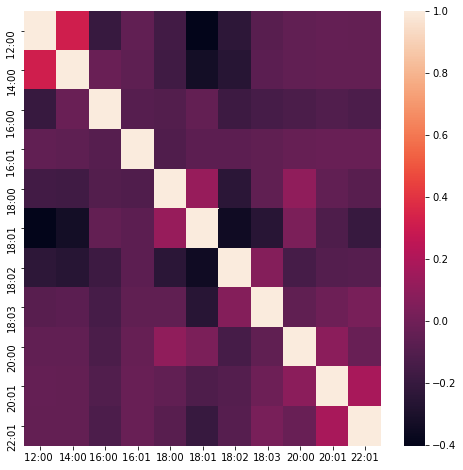

In [10]:
#Idenitfy corelated independent variables through heatmap
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
sns.heatmap(corrmat)

plt.savefig("Heatmap.png",dpi=300)

In [11]:
X_train.count()

12:00     161
14:00     161
16:00     161
16:01     161
18:00     161
18:01     161
18:02     161
18:03     161
20:00     161
20:01     161
22:01     161
dtype: int64

The training R2 is:  0.8867122618901787
The test R2 is:  0.827682390010044
MSE: 15.80
RMSE of test set: 3.98
RMSE of train set: 2.76
The mean accuracy is:  -0.49131976356663126


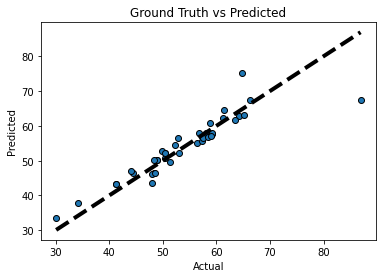

In [12]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Measure the R2 for training and test set
model_score = model.score(X_train,y_train)
print("The training R2 is: ", model.score(X_train, y_train))
print("The test R2 is: ", model.score(X_test, y_test))

# The mean squared error & Variance

from sklearn.metrics import mean_squared_error
from math import sqrt

y_predicted = model.predict(X_test)
y_predicted_train = model.predict(X_train)

print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))
print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y_train, y_predicted_train)))

#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())

#Plot the actual v/s predicted
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()


The training R2 is:  0.9067894361864021
The test R2 is:  0.8048494192474822
MSE: 17.89
RMSE: 4.23
RMSE of train set: 2.51
The mean accuracy is:  0.7807684347171399


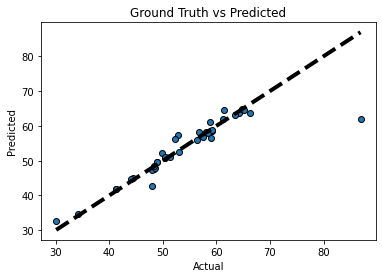

In [13]:
# Fitting Support Vector Regression to the Training set

from sklearn.svm import SVR
model = SVR(C=10.0, cache_size=100, coef0=0.1, degree=2, epsilon=0.5,kernel = 'rbf')
model.fit(X_train, y_train)

#Measure the R2 for training and test set
model_score = model.score(X_train,y_train)
print("The training R2 is: ", model.score(X_train, y_train))
print("The test R2 is: ", model.score(X_test, y_test))

# The mean squared error & Variance

from sklearn.metrics import mean_squared_error
from math import sqrt

y_predicted = model.predict(X_test)
y_predicted_train = model.predict(X_train)

print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))
print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y_train, y_predicted_train)))

#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())


#Plot the actual v/s predicted
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [ ]:
""""#Gridsearch SVR

from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = SVR()
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01],
              'epsilon':[0.1,0.5,1,10],
              'kernel': ['linear','poly','rbf']} 


tuning = GridSearchCV(estimator=model, 
                          param_grid = param_grid,
                          cv=3,
                          verbose=1,
                          n_jobs=-1)
    
tuning.fit(X_train, y_train)

print("Best parameters:")
print(tuning.best_params_)"""


Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


The training R2 is:  0.9414984094324335
The test R2 is:  0.8580272488560874
MSE: 13.02
RMSE of test set: 3.61
RMSE of train set: 1.99
The mean accuracy is:  0.7408498547839982


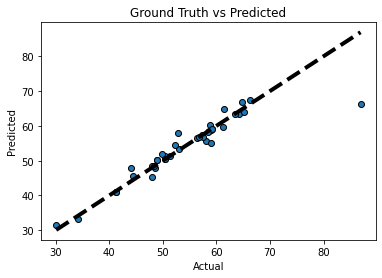

In [14]:
# Fitting RandomForest Regression to the Training set


from sklearn.ensemble import RandomForestRegressor
model =  RandomForestRegressor(n_estimators = 500, max_depth = 20, min_samples_split=2,
                                min_samples_leaf=2)
model.fit(X_train, y_train)


#Measure the R2 for training and test set
model_score = model.score(X_train,y_train)
print("The training R2 is: ", model.score(X_train, y_train))
print("The test R2 is: ", model.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
from math import sqrt


y_predicted = model.predict(X_test)
y_predicted_train = model.predict(X_train)

# The mean squared error & Variance
print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))
print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y_train, y_predicted_train)))


#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())

#Plot the actual v/s predicted
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()


In [15]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

The training R2 is:  0.9999989222810484
The test R2 is:  0.9023073874594202
MSE: 8.96
RMSE of test set: 2.99
RMSE of train set: 0.01
The mean accuracy is:  0.727289218239745


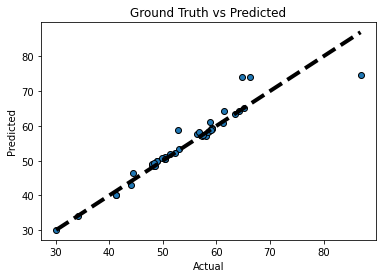

In [17]:
# Fitting XGB Regression to the Training set

model = XGBRegressor()

model.fit(X_train, y_train)

#Measure the R2 for training and test set
model_score = model.score(X_train,y_train)
print("The training R2 is: ", model.score(X_train, y_train))
print("The test R2 is: ", model.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
from math import sqrt


y_predicted = model.predict(X_test)
y_predicted_train = model.predict(X_train)

# The mean squared error & Variance
print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))
print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y_train, y_predicted_train)))


#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())


#Plot the actual v/s predicted
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()


In [18]:
#Grid search for XGB

from sklearn.model_selection import GridSearchCV

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=22)
model = XGBRegressor()
param_grid = {'eta':[0.05,0.1,0.15,0.2],
                 'max_depth':[4,6,8,10],
                 'subsample':[0.5,1],
                 'colsample_bytree':[0.5,1],
                 'eval_metric':['rmse'],
                 'seed':[42],
                 'n_estimators':np.arange(100,1001,100).tolist()}


tuning = GridSearchCV(estimator=model, 
                          param_grid = param_grid,
                          cv=3,
                          verbose=1,
                          n_jobs=-1)
    
tuning.fit(X_train, y_train)

print("Best parameters:")
print(tuning.best_params_)

Fitting 3 folds for each of 640 candidates, totalling 1920 fits
Best parameters:
{'colsample_bytree': 1, 'eta': 0.15, 'eval_metric': 'rmse', 'max_depth': 4, 'n_estimators': 100, 'seed': 42, 'subsample': 1}


The training R2 is:  0.99870555442571
The test R2 is:  0.8971081350177621
MSE: 5.62
RMSE of test set: 2.37
RMSE of train set: 0.32
The mean accuracy is:  0.8180251738352112


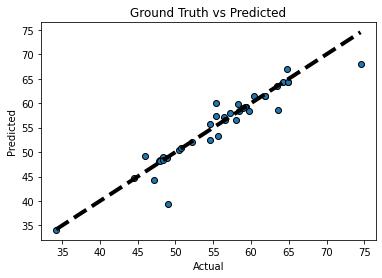

In [20]:
modelXGB = XGBRegressor(colsample_bytree = 1, eta = 0.15, eval_metric= 'rmse', max_depth= 4,
                     n_estimators= 100, seed= 42, subsample= 1)

modelXGB.fit(X_train, y_train)

#Measure the R2 for training and test set
model_score = modelXGB.score(X_train,y_train)
print("The training R2 is: ", modelXGB.score(X_train, y_train))
print("The test R2 is: ", modelXGB.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
from math import sqrt


y_predicted = modelXGB.predict(X_test)
y_predicted_train = modelXGB.predict(X_train)

# The mean squared error & Variance
print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))
print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y_train, y_predicted_train)))


#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = modelXGB, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())


#Plot the actual v/s predicted
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()


In [ ]:
#Grid search for RF

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=22)
model = RandomForestRegressor()
param_grid = {'eta':[0.05,0.1,0.15,0.2],
                 'max_depth':[4,6,8,10],
                 'subsample':[0.5,1],
                 'colsample_bytree':[0.5,1],
                 'eval_metric':['rmse'],
                 'seed':[42],
                 'n_estimators':np.arange(100,1001,100).tolist()}


param_grid={'n_estimators':np.arange(100,1001,100).tolist(),
                'max_features':['sqrt'],
                'max_depth':[20,40,60,80,None],
                'min_samples_split':[2,6,10]}

tuning = GridSearchCV(estimator=model, 
                          param_grid = param_grid,
                          cv=3,
                          verbose=1,
                          n_jobs=-1)
    

tuning.fit(X_train, y_train)

print("Best parameters:")
print(tuning.best_params_)

The training R2 is:  0.969100266641252
The test R2 is:  0.8700345516911879
MSE: 7.10
RMSE of test set: 2.67
RMSE of train set: 1.54
The mean accuracy is:  0.7739488702563225


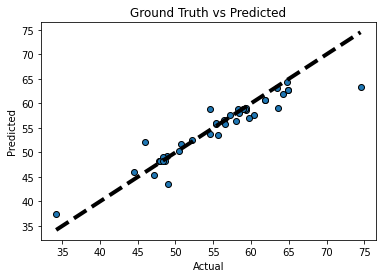

In [21]:
modelRF = RandomForestRegressor(max_depth = None, max_features = 'sqrt', min_samples_split = 2, n_estimators = 100)

modelRF.fit(X_train, y_train)

#Measure the R2 for training and test set
model_score = modelRF.score(X_train,y_train)
print("The training R2 is: ", modelRF.score(X_train, y_train))
print("The test R2 is: ", modelRF.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
from math import sqrt


y_predicted = modelRF.predict(X_test)
y_predicted_train = modelRF.predict(X_train)

# The mean squared error & Variance
print("MSE: %.2f"% mean_squared_error(y_test, y_predicted))
print("RMSE of test set: %.2f"% sqrt(mean_squared_error(y_test, y_predicted)))
print("RMSE of train set: %.2f"% sqrt(mean_squared_error(y_train, y_predicted_train)))


#k-cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = modelRF, X = X_train, y= y_train, cv=5)
print("The mean accuracy is: ", accuracies.mean())


#Plot the actual v/s predicted
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

# Perform Causal analytics - Accumulated Local Effects

In [24]:
from alibi.explainers import ALE, plot_ale

In [ ]:
XGB_ale = ALE(modelXGB.predict, feature_names = X_train.columns, target_names = ['Cetan Number'])
XGB_exp = XGB_ale.explain(np.array(X_train))

matplotlib.legend:WARNING: No handles with labels found to put in legend.


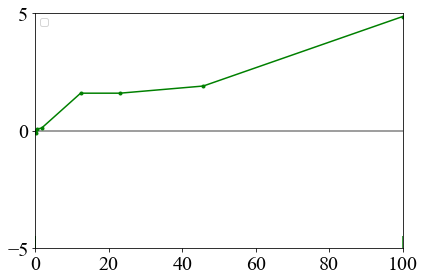

In [160]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from cycler import cycler
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'
matplotlib.rcParams['axes.prop_cycle'] =  cycler(color =['g'])


label_size = 20
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size 


#matplotlib.rcParams['legend.loc'] = []

tick_spacing = 5

fig, ax = plt.subplots()

plot_ale(XGB_exp,features = ['22:01'],ax=ax,line_kw={'label':'_nolegend_'})
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xlim([0, 100])
ax.set_ylim([-5, 5])
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

#plt.savefig("CN_22_1.png",dpi=300)

# Shap analysis

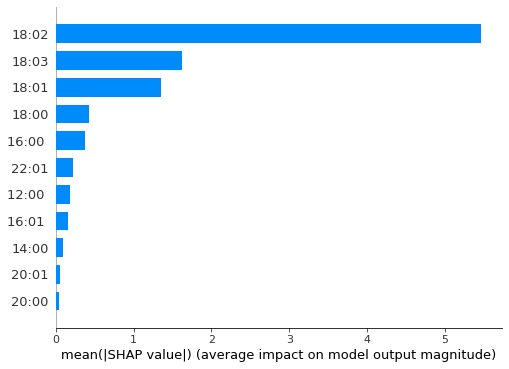

In [26]:
import shap
shap_values = shap.TreeExplainer(modelXGB).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Perform optimization - Prescriptive analytics

In [30]:
from pyswarm import pso

In [31]:
def objective(x):
    x1=x[0]
    x2=x[1]
    x3=x[2]
    x4=x[3]
    x5=x[4]
    x6=x[5]
    x7=x[6]
    x8=x[7]
    x9=x[8]
    x10=x[9]
    x11=x[10]
   
    
    sum = 100-(x[0]+x[1]+x[2]+x[3]+x[4]+x[5]+x[6]+x[7]+x[8]+x[9]+x[10])
    
    if sum >0:
        CV = 1000000000
    else:
        CV = 0  
    
    X_optPSO = np.array ([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11]).reshape(1, -1)
    constraint_violoation = CV
    
    y_predoptPSO = modelXGB.predict(X_optPSO)
    return -(y_predoptPSO)+ constraint_violoation
    

lb = [0, 0.5, 13, 0,20 ,15, 0, 0, 0, 0 ,0]
ub = [22, 1, 20, 1,40, 25, 10, 5, 5, 5, 5 ]
      

#Run multiple rounds of optimization to get a decent sense of the values 
for fopt in range(10):
    xopt, fopt = pso(objective, lb, ub)
    
    print(xopt, fopt)
 

Stopping search: maximum iterations reached --> 100
[22.          0.80688699 20.          0.86343021 40.         19.31140791
  0.          0.15171312  4.31919611  4.96835251  2.25056345] [-70.002625]
Stopping search: maximum iterations reached --> 100
[13.51353391  0.56322506 20.          1.         40.         19.68943582
  0.13488939  0.74750598  0.34439094  1.63248094  3.90277503] [-70.614136]
Stopping search: maximum iterations reached --> 100
[ 9.2758738   0.53479703 20.          0.99825897 39.83395331 20.02612281
  0.          0.49694638  3.52453275  5.          5.        ] [-70.17729]
Stopping search: maximum iterations reached --> 100
[22.          0.8745954  20.          0.478693   40.         23.52760184
  0.          0.45168786  2.93478849  0.82704662  3.03377718] [-70.29779]
Stopping search: maximum iterations reached --> 100
[20.98831322  0.82824398 20.          0.63942918 38.14421836 19.23990721
  0.          0.15586099  3.92698929  1.23493414  2.71331035] [-70.477455]
St